In [36]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import re
from collections import Counter
import seaborn as sns

In [4]:
from datasets import load_dataset

ds = load_dataset("Jsevisal/go_emotions_wheel")

In [6]:
df = pl.from_dicts(ds['train'][:])

In [7]:
df

text,labels,id
str,list[i64],str
"""My favourite food is anything …",[5],"""eebbqej"""
"""Now if he does off himself, ev…",[5],"""ed00q6i"""
"""WHY THE FUCK IS BAYLESS ISOING""",[7],"""eezlygj"""
"""To make her feel threatened""",[2],"""ed7ypvh"""
"""Dirty Southern Wankers""",[7],"""ed0bdzj"""
…,…,…
"""Added you mate well I’ve just …",[0],"""edsb738"""
"""Always thought that was funny …",[3],"""ee7fdou"""
"""What are you talking about? An…",[7],"""efgbhks"""


In [12]:
!python3 -m spacy download es_core_news_lg

     |██████████████████              | 319.2 MB 1.5 MB/s eta 0:02:4903              | 113.2 MB 145.4 MB/s eta 0:00:04

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 568.0 MB 7.5 kB/s  eta 0:00:01| 458.5 MB 79.9 MB/s eta 0:00:02��███████████▏| 553.7 MB 82.4 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')


In [13]:
nlp = spacy.load("es_core_news_lg")

In [19]:
def extract_multiword_terms(text: str):
    text = re.sub(r'[^\w\s]', '', text.lower())  # minúsculas y sin puntuación
    doc = nlp(text)
    return [
        chunk.text for chunk in doc.noun_chunks
        if len(chunk.text.split()) >= 2
    ]

In [20]:
multiword_phrases =  df.select('text').to_series().to_list()

In [21]:
all_terms = []
for text in multiword_phrases:
    all_terms.extend(extract_multiword_terms(text))

In [28]:
term_counter = Counter(all_terms)

In [29]:
for term, freq in term_counter.most_common(10):
    print(f"{term}: {freq}")

i think: 70
thank you: 63
i hate: 49
i wish: 48
if you: 41
i have: 37
i had: 29
i cant: 25
i appreciate: 24
on the: 22


findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


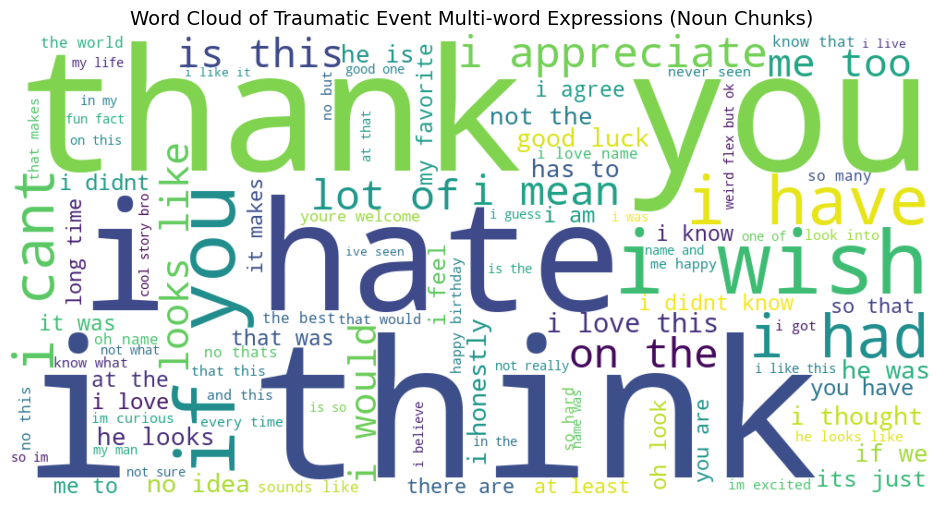

In [31]:
from wordcloud import WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    max_words=100,
    colormap='viridis'
).generate_from_frequencies(term_counter)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Traumatic Event Multi-word Expressions (Noun Chunks)", fontsize=14, fontname='Times New Roman')
plt.show()